# Map tissue expression

This notebook explores how you can explore whether the nodes in your network are expressed in a tissue of interest. The annotations are accessed from the Annotation object of Omnipath, and are based on expression data from the Human Protein Atlas.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko.inputs import Universe
from neko._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 6.01 s, sys: 1.56 s, total: 7.57 s
Wall time: 5.17 s


## 1. Import genes as network nodes

In [2]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

In [3]:
new_net1 = Network(genes, resources = 'omnipath')

In [4]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


## 2. Check if the genes are annotated in the tissue of interest (e.g., in colorectal cancer)

In [5]:
annot = Ontology()
results_df = annot.check_tissue_annotations(genes_df = new_net1.nodes, tissue = 'colorectal cancer')
print(results_df)

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

  Genesymbol  in_tissue
0        SRC       True
1     NOTCH1       True
2       PTK2       True
3       CDH1       True
4       CDH2       True
5        VIM       True
6     MAP4K4       True
7      LATS1       True
8      LATS2       True
9      PTK2B       True


## 3. Color nodes based on their presence/absence in the tissue of interest

The `tissue_mapping` functions highligts as light blue all the nodes of the network that are expressed in the used-defined system.

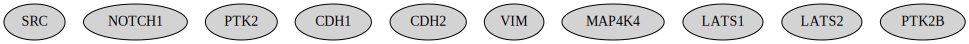

In [6]:
network_visualizer = NetworkVisualizer(new_net1)
network_visualizer.tissue_mapping(results_df)
network_visualizer.render()